In [1]:
import utilities
import Environment
import Shop

In [2]:
from mab.ts_learner import *
from mab.ucb_learner import *


#we know: number of customers per class, price of second item, conversion rate of second item
#environment setting
shop_clairvoyant = Shop.Shop()
shop_student = Shop.Shop()

env = Environment.Environment(shop_clairvoyant.prices1,shop_clairvoyant.prices2,shop_clairvoyant.discounts)

shop_clairvoyant.set_conv_rate(env.true_conv1, env.true_conv2)
shop_student.set_conv_rate(env.true_conv1,env.true_conv2)


In [3]:
days = 365
total_revenue = []

arms = env.prices1
ts_learner =TS_Learner(arms=arms)      
#u_learner = UCB(n_arms=len(arms))

ts_rewards_per_class_per_day = []
clairvoyant_per_class_per_day = []
#u_rewards_per_experiment = [np.empty([n_experiments, env.customers[i]]) for i in range(shop.n_classes)]


for day in range(days):
    #generating customers

    env.generate_next_day_customers()
    
    shop_clairvoyant.set_expected_customers(env.customers)
    shop_student.set_expected_customers(env.customers)

    chosen_price1 = ts_learner.pull_arm(shop_student.customers)[0] 
    #for each day, we choose a different candidate price1 and then use it to calculate the promos of price2

    shop_clairvoyant.best_promo_per_class()
    shop_student.best_promo_per_class(chosen_price1)
    
    shop_clairvoyant.print_coupons()
    shop_student.print_coupons()
    
    clairvoyant_per_class = []
    
    revenue = []
    np.random.shuffle(shop_student.customers_random)

    for cust in shop_student.customers_random:
        partial_revenue = 0
        cust = (int)(cust)

        has_bought1 = env.round1(cust, shop_student.best_price[0])
        ts_learner.update(chosen_price1, has_bought1, cust)
        
        partial_revenue = has_bought1*shop_student.best_price[0]

        if has_bought1 == 1:
            has_bought2 = env.round2(cust, shop_student.matched_promos[cust], shop_student.best_price[1])
            partial_revenue += has_bought2*shop_student.best_price[1]*(1-shop_student.discounts[shop_student.matched_promos[cust]])
        revenue.append(partial_revenue)
        expected_revenue = shop_clairvoyant.best_price[0]*env.true_conv1[cust, utilities.index(env.prices1, shop_clairvoyant.best_price[0])] + env.true_conv1[cust, utilities.index(env.prices1, shop_clairvoyant.best_price[0])]*env.true_conv2[cust, shop_clairvoyant.matched_promos[cust], utilities.index(env.prices1, shop_clairvoyant.best_price[0])]*shop_clairvoyant.best_price[1]*(1-shop_clairvoyant.discounts[shop_clairvoyant.matched_promos[cust]])
        clairvoyant_per_class.append(expected_revenue)
    
    ts_rewards_per_class_per_day.append(np.mean(revenue))
    clairvoyant_per_class_per_day.append(np.mean(clairvoyant_per_class))

        
        #total_revenue.append([np.mean(ts_rewards_per_class_per_day)])
        #total_clairvoyant.append([np.mean(clairvoyant)])
        

        #pulled_arm = u_learner.pull_arm()
        #reward = env.round_1(pulled_arm)
        #u_learner.update(pulled_arm,reward,c)
        
        #u_learner_per_experiment[c][customer] = u_learner.rewards_per_arm[c]


In [4]:
print(ts_learner.pull_arm(env.customers))
print(shop_clairvoyant.best_price)
print(shop_clairvoyant.prices1)

(2,)
(360.0, 1000.0)
[ 80. 200. 360. 560. 800.]


In [5]:
import matplotlib.pyplot as plt


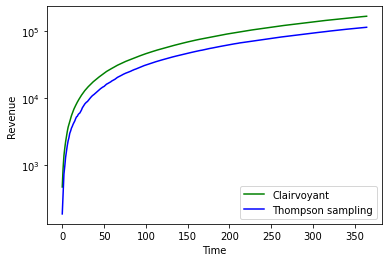

In [6]:
#plt.plot(np.array(clairvoyant_per_class_per_day)-np.array(ts_rewards_per_class_per_day), color='red')
plt.plot(np.cumsum(clairvoyant_per_class_per_day), color='green', label='Clairvoyant')
plt.plot(np.cumsum(ts_rewards_per_class_per_day),color='blue',label='Thompson sampling')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.yscale('symlog')




In [7]:
print(ts_rewards_per_class_per_day)

[185.4368932038835, 198.29787234042553, 349.3457943925234, 223.75, 345.72727272727275, 297.44444444444446, 351.8987341772152, 338.19444444444446, 278.989898989899, 417.81609195402297, 236.62790697674419, 336.0377358490566, 224.36974789915968, 292.4107142857143, 236.11111111111111, 251.2962962962963, 357.7692307692308, 316.45569620253167, 110.0, 316.9811320754717, 195.54545454545453, 122.52873563218391, 324.1111111111111, 343.7962962962963, 498.3636363636364, 336.9791666666667, 311.14285714285717, 392.05607476635515, 240.0, 282.44897959183675, 145.3781512605042, 330.3529411764706, 306.2121212121212, 396.52777777777777, 328.72093023255815, 324.51612903225805, 323.9568345323741, 228.10526315789474, 253.10679611650485, 297.3809523809524, 334.88, 266.42857142857144, 331.5189873417722, 348.0, 388.4146341463415, 292.44444444444446, 305.0980392156863, 258.52941176470586, 335.35714285714283, 245.58139534883722, 198.46774193548387, 424.3956043956044, 419.3333333333333, 392.7906976744186, 206.666

In [8]:

days = 365
total_revenue = []

arms = env.prices1
u_learner = UCB(n_arms=len(arms))
#ts_learner =TS_Learner(arms=arms)      


u_rewards_per_class_per_day = []
clairvoyant_per_class_per_day = []
u_rewards_per_experiment = []


for day in range(days):
    #generating customers

    env.generate_next_day_customers()
    
    shop_clairvoyant.set_expected_customers(env.customers)
    shop_student.set_expected_customers(env.customers)

    chosen_price1 = u_learner.pull_arm()
    #for each day, we choose a different candidate price1 and then use it to calculate the promos of price2

    shop_clairvoyant.best_promo_per_class()
    shop_student.best_promo_per_class(chosen_price1)
    
    shop_clairvoyant.print_coupons()
    shop_student.print_coupons()
    
    clairvoyant_per_class = []
    
    revenue = []
    np.random.shuffle(shop_student.customers_random)

    for cust in shop_student.customers_random:
        partial_revenue = 0
        cust = (int)(cust)

        has_bought1 = env.round1(cust, shop_student.best_price[0])
        u_learner.update(chosen_price1, has_bought1, cust)
        
        partial_revenue = has_bought1*shop_student.best_price[0]

        if has_bought1 == 1:
            has_bought2 = env.round2(cust, shop_student.matched_promos[cust], shop_student.best_price[1])
            partial_revenue += has_bought2*shop_student.best_price[1]*(1-shop_student.discounts[shop_student.matched_promos[cust]])
        revenue.append(partial_revenue)
        expected_revenue = shop_clairvoyant.best_price[0]*env.true_conv1[cust, utilities.index(env.prices1, shop_clairvoyant.best_price[0])] + env.true_conv1[cust, utilities.index(env.prices1, shop_clairvoyant.best_price[0])]*env.true_conv2[cust, shop_clairvoyant.matched_promos[cust], utilities.index(env.prices1, shop_clairvoyant.best_price[0])]*shop_clairvoyant.best_price[1]*(1-shop_clairvoyant.discounts[shop_clairvoyant.matched_promos[cust]])
        clairvoyant_per_class.append(expected_revenue)
    
    u_rewards_per_class_per_day.append(np.mean(revenue))
    clairvoyant_per_class_per_day.append(np.mean(clairvoyant_per_class))

        
        #total_revenue.append([np.mean(ts_rewards_per_class_per_day)])
        #total_clairvoyant.append([np.mean(clairvoyant)])
        

        #pulled_arm = u_learner.pull_arm()
        #reward = env.round_1(pulled_arm)
        #u_learner.update(pulled_arm,reward,c)
        
        #u_learner_per_experiment[c][customer] = u_learner.rewards_per_arm[c]


Text(0, 0.5, 'Revenue')

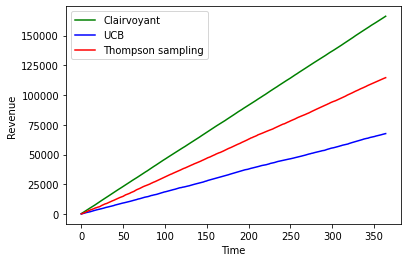

In [9]:
plt.plot(np.cumsum(clairvoyant_per_class_per_day), color='green', label='Clairvoyant')
plt.plot(np.cumsum(u_rewards_per_class_per_day),color='blue',label='UCB')
plt.plot(np.cumsum(ts_rewards_per_class_per_day),color='red',label='Thompson sampling')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')

